In [1]:
# Author: Geethu Thottungal Harilal
# data from : https://power.larc.nasa.gov/data-access-viewer/

# This code will calculate the pearson correlation and plot correlation matrix, 
# and remove data columns with high correlation (+ or - .7) for the Wales dataset and
# save the output data columns in new csv file

## importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from  matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings('ignore')

## Read data

In [3]:
# Load dataset
data = pd.read_csv('Wales_dataset_cleaned.csv')   

In [4]:
data['date'] = pd.to_datetime(data['date'])

# Define a function to map month to season
def get_season(month):
    if 3 <= month <= 5:
        return 1  # Spring
    elif 6 <= month <= 8:
        return 2  # Summer
    elif 9 <= month <= 11:
        return 3  # Autumn
    else:
        return 4  # Winter

# Apply the function to create the 'season' column
data['season'] = data['date'].dt.month.apply(get_season)

In [5]:
data.columns

Index(['date', 'Rainfall', 'SP', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WD10M', 'SH2M', 'RH2M', 'T2M', 'T2MDEW', 'T2MWET',
       'TSkin', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'WS50M', 'WS50M_MAX',
       'WS50M_MIN', 'WS50M_RANGE', 'WD50M', 'season'],
      dtype='object')

In [6]:
data.shape

(15551, 23)

### Correlation analysis of input features using heatmap

In [7]:
# Select the first 20 columns
data_sub = data.iloc[:, 2:23]

In [8]:
data_sub.columns

Index(['SP', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WD10M', 'SH2M',
       'RH2M', 'T2M', 'T2MDEW', 'T2MWET', 'TSkin', 'T2M_RANGE', 'T2M_MAX',
       'T2M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'WD50M',
       'season'],
      dtype='object')

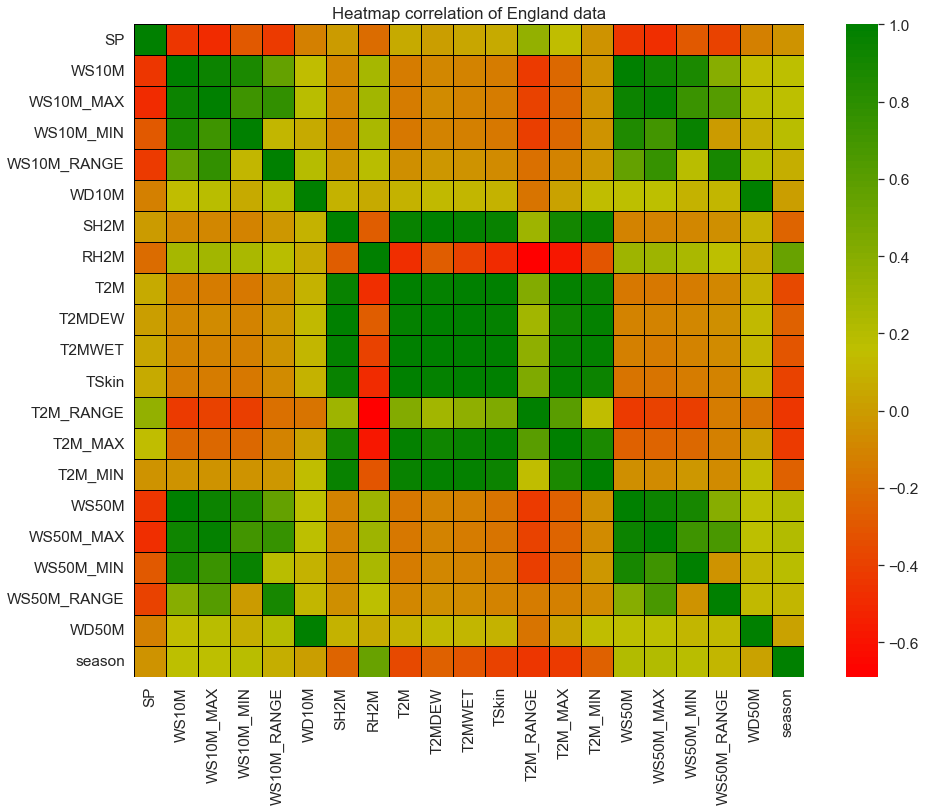

In [9]:

# Calculate the Pearson correlation matrix
corr = data_sub.corr()

# Create a custom colormap ranging from red to green
cmap=LinearSegmentedColormap.from_list('ryg',["r", "y", "g"], N=100) 
sb.set(font_scale=1.4)
# Create the heatmap with a border
plt.figure(figsize=(15, 12))
sb.heatmap(corr, cmap=cmap, linewidths=1, linecolor='black')
plt.title("Heatmap correlation of England data")
plt.show()

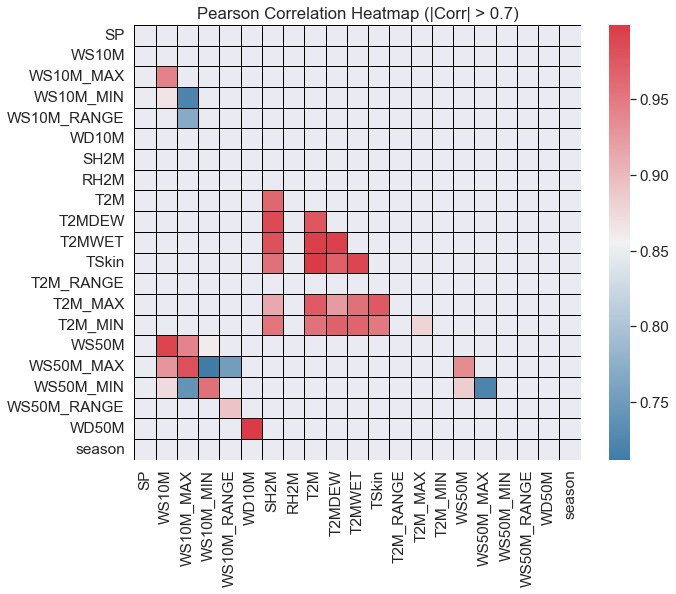

In [10]:
# Create a custom colormap ranging from red to green
cmap = sb.diverging_palette(240, 10, as_cmap=True)

# Create a mask to filter correlation values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set values outside the mask to NaN
correlation_matrix_masked = corr.mask(mask)

# Filter the heatmap to show only values > +0.7 or < -0.7
filtered_corr = correlation_matrix_masked[(correlation_matrix_masked > 0.7) | (correlation_matrix_masked < -0.7)]

# Create the heatmap with a border
plt.figure(figsize=(10, 8))
sb.heatmap(filtered_corr,  cmap=cmap, linewidths=0.5, linecolor='black')
plt.title('Pearson Correlation Heatmap (|Corr| > 0.7)')
plt.show()

In [11]:
data.drop(columns=['WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','T2M_RANGE', 'T2M_MAX',
       'T2M_MIN','T2MDEW', 'T2MWET', 'TSkin','WS50M_RANGE',  'WS50M_MAX'],inplace=True)

In [12]:
data.columns

Index(['date', 'Rainfall', 'SP', 'WS10M', 'WD10M', 'SH2M', 'RH2M', 'T2M',
       'WS50M_MIN', 'WD50M', 'season'],
      dtype='object')

In [13]:
# Select the first 35 columns
data_sub = data.iloc[:, 2:10]

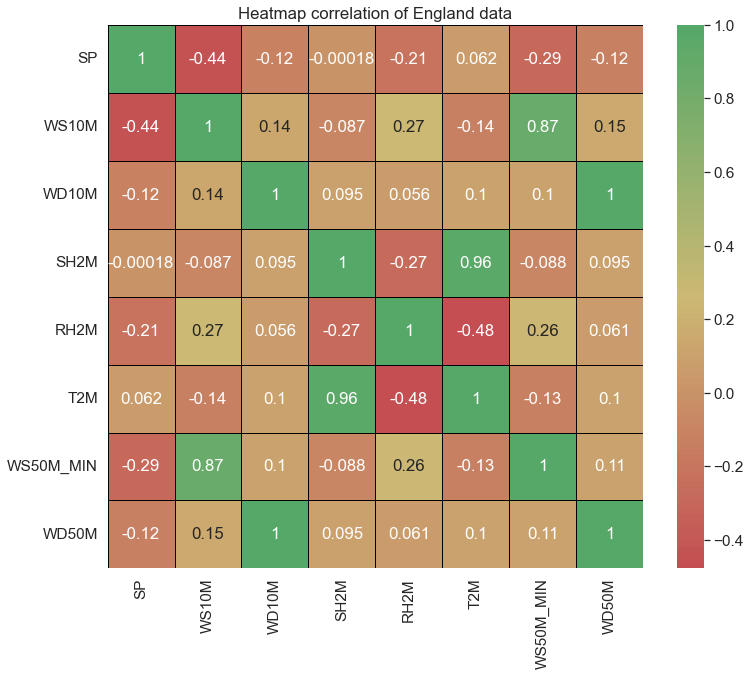

In [14]:
# Calculate the Pearson correlation matrix
corr = data_sub.corr()

# Create a custom colormap ranging from red to green
cmap=LinearSegmentedColormap.from_list('ryg',["r", "y", "g"], N=100) 

# Create the heatmap with a border
plt.figure(figsize=(12, 10))
sb.heatmap(corr, cmap=cmap, annot=True, linewidths=1, linecolor='black')
plt.title("Heatmap correlation of England data")
plt.show()

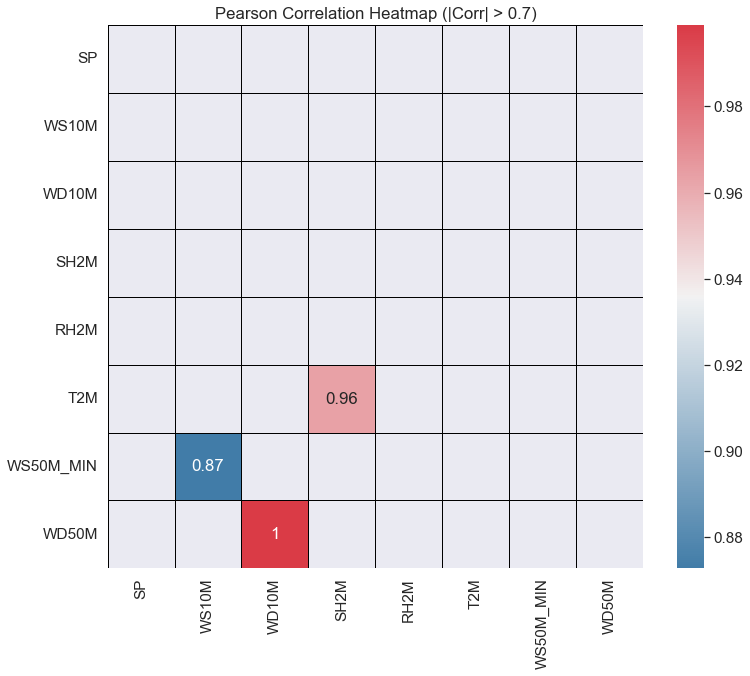

In [15]:
# Create a custom colormap ranging from red to green
cmap = sb.diverging_palette(240, 10, as_cmap=True)

# Create a mask to filter correlation values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set values outside the mask to NaN
correlation_matrix_masked = corr.mask(mask)

# Filter the heatmap to show only values > +0.7 or < -0.7
filtered_corr = correlation_matrix_masked[(correlation_matrix_masked > 0.7) | (correlation_matrix_masked < -0.7)]

# Create the heatmap with a border
plt.figure(figsize=(12, 10))
sb.heatmap(filtered_corr,  cmap=cmap,annot=True, linewidths=0.5, linecolor='black')
plt.title('Pearson Correlation Heatmap (|Corr| > 0.7)')
plt.show()

In [16]:
data.columns

Index(['date', 'Rainfall', 'SP', 'WS10M', 'WD10M', 'SH2M', 'RH2M', 'T2M',
       'WS50M_MIN', 'WD50M', 'season'],
      dtype='object')

In [17]:
data.drop(columns=['WD50M', 'WS50M_MIN','SH2M'],inplace=True)

In [18]:
data.shape

(15551, 8)

In [19]:
data.columns

Index(['date', 'Rainfall', 'SP', 'WS10M', 'WD10M', 'RH2M', 'T2M', 'season'], dtype='object')

In [20]:
# Select the first 35 columns
data_sub = data.iloc[:, 2:8]

In [21]:
data_sub.columns

Index(['SP', 'WS10M', 'WD10M', 'RH2M', 'T2M', 'season'], dtype='object')

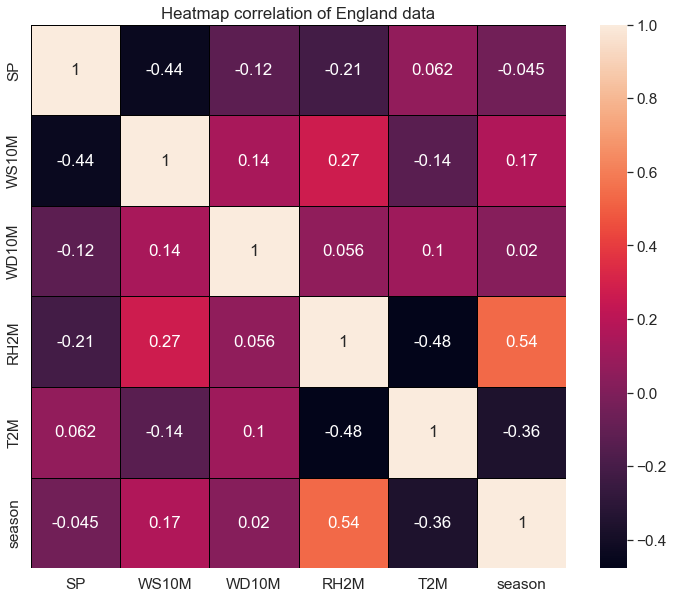

In [22]:
# Calculate the Pearson correlation matrix
corr = data_sub.corr()

# Create a custom colormap ranging from red to green
cmap=LinearSegmentedColormap.from_list('ryg',["r", "y", "g"], N=10) 

# Create the heatmap with a border
plt.figure(figsize=(12, 10))
sb.heatmap(corr,linewidths=1,annot=True, linecolor='black')
plt.title("Heatmap correlation of England data")
plt.show()

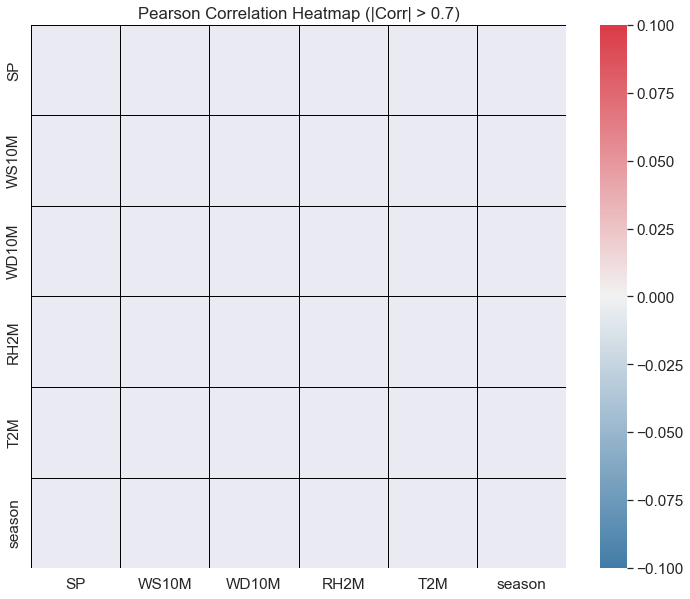

In [23]:
# Create a custom colormap ranging from red to green
cmap = sb.diverging_palette(240, 10, as_cmap=True)

# Create a mask to filter correlation values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set values outside the mask to NaN
correlation_matrix_masked = corr.mask(mask)

# Filter the heatmap to show only values > +0.7 or < -0.7
filtered_corr = correlation_matrix_masked[(correlation_matrix_masked > 0.7) | (correlation_matrix_masked < -0.7)]

# Create the heatmap with a border
plt.figure(figsize=(12, 10))
sb.heatmap(filtered_corr,  cmap=cmap,annot=True, linewidths=0.5, linecolor='black')
plt.title('Pearson Correlation Heatmap (|Corr| > 0.7)')
plt.show()

In [24]:
data.to_csv("Wales_dataset_final_1981-2023.csv",index=0)